In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(42)

## Batch Gradent Descent
Here we create an implementation of batch gradiend descent for learning purposes. We will create a synthetic dataset and use nothing but numpy to perform the training and predictions.

In [25]:
def generate_dataset(n_features, n_classes, n_samples):
    # coefficients for hidden function
    hidden_coeffs = np.random.randn(n_features, n_classes)
    
    # generate input features
    X = np.random.randn(n_samples, n_features)
    
    # calculate scores for each class
    scores = X @ hidden_coeffs
    
    # Apply softmax to get probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Assigning classes with highest probabilities as the output
    y = np.argmax(probs, axis=1)
    
    return X, y

n_features = 2
n_classes = 3
n_samples = 500
X, y = generate_dataset(n_features, n_classes, n_samples)

In [26]:
indexes = range(0, len(X))
random_indexes = np.random.permutation(indexes)
train_idx = random_indexes[:400]
test_idx = random_indexes[400:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

Text(0, 0.5, 'X1')

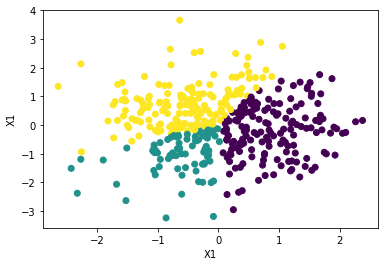

In [27]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel('X1')
plt.ylabel('X1')

We now start building infrastructure to perform the calculations. We will require functions that do the following:
- Initialize softmax parameters (weights & biases)
- Calculates softmax
- Calculates cross-entropy loss
- Calculates gradients
- Trains the model

In [39]:
def initialize_parameters(n_features, n_classes):
    np.random.seed(42)
    W = np.random.randn(n_features, n_classes) * 0.01
    b = np.zeros((1, n_classes))
    return W, b

def softmax(scores):
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs

def cross_entropy(y_true, probs):
    n_samples = len(y_true)
    log_probs = -np.log(probs[np.arange(n_samples), y_true])
    loss = np.sum(log_probs)/n_samples
    return loss

def compute_gradients(X, y_true, probs):
    n_samples = len(X)
    
    # numpy advanced indexing to select the correct elements.
    # cross-entropy loss gradient w.r.t. tue class scores min
    #     softmax probabilities is -1
    d_scores = probs
    d_scores[np.arange(n_samples), y_true] -= 1
    d_scores /= n_samples
    
    dW = np.dot(X.T, d_scores)
    db = np.sum(d_scores, axis=0, keepdims=True)
    
    return dW, db

def train_softmax_regression(X, y, learning_rate=0.1, niter=1000):
    W, b = initialize_parameters(n_features, n_classes)
    
    for i in range(niter):
        scores = np.dot(X, W) + b
        probs = softmax(scores)
        loss = cross_entropy(y, probs)
        
        if i%100 == 0:
            print(f"Loss at iteration {i}: {loss}")
            
        dW, db = compute_gradients(X, y, probs)
        
        W -= learning_rate * dW
        b -= learning_rate* db
        
    return W, b

In [40]:
W, b = train_softmax_regression(X_train, y_train)

Loss at iteration 0: 1.0998394226374735
Loss at iteration 100: 0.38923299759488167
Loss at iteration 200: 0.3046322788295905
Loss at iteration 300: 0.26528052735333546
Loss at iteration 400: 0.2408048464633737
Loss at iteration 500: 0.2234311278432698
Loss at iteration 600: 0.2101351171984183
Loss at iteration 700: 0.19945711732858626
Loss at iteration 800: 0.19059077824850618
Loss at iteration 900: 0.18304713965250882
